# NAND-gate

In [38]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [39]:
#data
x_train = torch.tensor([[1, 1], [0, 0], [1, 0], [0, 1]]).float()
y_train = torch.tensor([[0], [1], [1], [1]]).float()

In [55]:
#model
class SigmoidModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[-10.0], [10.0]], requires_grad=True)
        self.b = torch.tensor([[-5.0]], requires_grad=True)

    def logits(self, x):
        return torch.Tensor(x) @ self.W + self.b

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))

    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)
        # Similar to:
        # return -torch.mean(y * torch.log(self.f(x)) +
        # 

In [56]:
#optimizing
model = SigmoidModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.00001)

for epoch in range(100_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[-6.6840],
        [-8.7868]], requires_grad=True), b = tensor([[-7.8431]], requires_grad=True), loss = tensor(9.7501, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


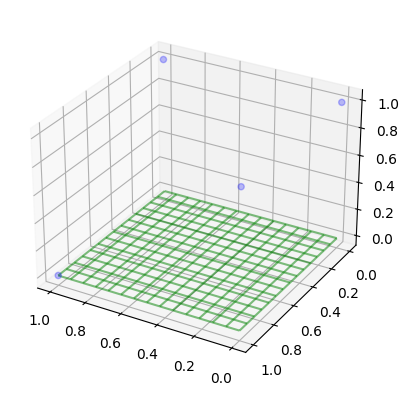

In [57]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 15), np.linspace(0, 1, 15))
z_grid = np.empty([15, 15])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# ax.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color='green')
ax.scatter3D(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), marker='o', color='blue', alpha=0.25)

for i in range(0, x_grid.shape[0]):
    for j in range(0, x_grid.shape[1]):
        z_grid[i, j] = model.f([[x_grid[i, j], y_grid[i, j]]])
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.50)

ax.view_init(elev=28, azim=120)

plt.show()